In [2]:
#Importacion de librerias 
import pandas as pd
import pandas as pd
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
#Carga del dataset
df = pd.read_csv("C:/Users/david/Downloads/email.csv")
df.head()


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
print("Cantidad de labels:", len(df["Category"]))
print("Cantidad de emails:", len(df["Message"]))

Cantidad de labels: 5573
Cantidad de emails: 5573


In [7]:
# 2️ Preprocesador de texto
class ProcesadorTexto:
    def __init__(self):
        self.stemmer = nltk.PorterStemmer()
        self.stopwords = set(nltk.corpus.stopwords.words('english'))
        self.puntuacion = list(string.punctuation)

    def limpiar(self, texto):
        for signo in self.puntuacion:
            texto = texto.replace(signo, "")
        texto = texto.replace("\t", " ").replace("\n", " ")
        palabras = texto.split(" ")
        palabras_procesadas = [self.stemmer.stem(p.lower()) for p in palabras if p.lower() not in self.stopwords and p.strip() != '']
        return palabras_procesadas

In [8]:
# 3 Aplicar preprocesamiento
procesador = ProcesadorTexto()
df["email_procesado"] = df["Message"].apply(lambda t: " ".join(procesador.limpiar(t)))

In [9]:
# 3 Aplicar preprocesamiento
df.head()

,Category,Message,email_procesado
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though


In [10]:
# 4 Dividir en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(df["email_procesado"], df["Category"], test_size=0.2, random_state=42)

In [11]:
# 5 Vectorizar los textos
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [12]:

# 6 Entrenar el modelo
modelo = LogisticRegression()
modelo.fit(X_train_vect, y_train)


LogisticRegression()

In [13]:
# 8️ Predecir y evaluar
y_pred = modelo.predict(X_test_vect)
accuracy = accuracy_score(y_test, y_pred)

In [15]:
print(" Precisión del modelo:", round(accuracy, 3))
print("\n Correos de prueba:")
for correo, pred in zip(X_test, y_pred):
    print(f" \"{correo[:50]}...\" → Predicción: {pred}")

 Precisión del modelo: 0.98

 Correos de prueba:
 "still come tonight..." → Predicción: ham
 "hey babe far 2 spunout 2 spk da mo dead 2 da wrld ..." → Predicción: ham
 "ya even cooki jelli..." → Predicción: ham
 "sorri ive gone place ill tomorrow realli sorri..." → Predicción: ham
 "go ride bike..." → Predicción: ham
 "ask u meet da ge tmr nite..." → Predicción: ham
 "night sweet sleep well ive see exorc emili rose ma..." → Predicción: ham
 "sez how u de arab boy hope u r good give love 2 ev..." → Predicción: ham
 "get 3 lion england tone repli lionm 4 mono lionp 4..." → Predicción: spam
 "im come back thursday yay gonna ok get money cheer..." → Predicción: ham
 "k wen ur free come home also tel vikki hav sent ma..." → Predicción: ham
 "yup leav right back soon..." → Predicción: ham
 "much torch 9ja..." → Predicción: ham
 "free messag activ 500 free text messag repli messa..." → Predicción: spam
 "send new number..." → Predicción: ham
 "tmobil custom may claim free camera phone upgrad 

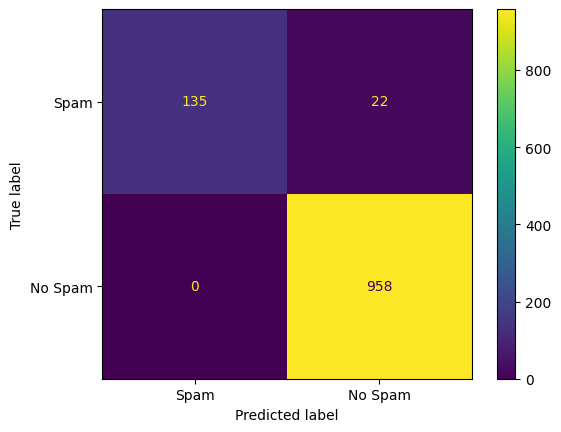

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 9 Calcular la matriz de confusión
matriz = confusion_matrix(y_test, y_pred, labels=["spam", "ham"])

# 10 Mostrar la matriz de forma visual
disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=["Spam", "No Spam"])
disp.plot()
